# Salt, Salinity and Freshwater Budgets
*Contributors*: [Jan-Erik Tesdal](https://github.com/jetesdal), [Ryan Abernathey](https://github.com/rabernat), [Ian Fenty](https://github.com/ifenty), and [Emma Boland](https://github.com/emmomp)

A major part of this tutorial is based on "*A Note on Practical Evaluation of Budgets in ECCO Version 4 Release 3"* by Christopher G. Piecuch (https://ecco.jpl.nasa.gov/drive/files/Version4/Release3/doc/v4r3_budgets_howto.pdf). Calculation steps and Python code presented here are converted from the MATLAB code presented in the above reference.

## Objectives

This tutorial will go over three main budgets which are all related:

1. Salt budget
1. Salinity budget
1. Freshwater budget

We will describe the governing equations for the conservation for both salt, salinity and freshwater content and discuss the subtle differences one needs to be aware of when closing budgets of salt and freshwater content (extensive quantities) versus the budget of salinity (an intensive quantity) in ECCOv4.

## Introduction

The general form for the salt/salinity budget can be formulated in the same way as with the [heat budget](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Heat_budget_closure.html#Introduction), where instead of potential temperature ($\theta$), the budget is described with salinity ($S$).

\begin{equation}\label{general}
\begin{aligned}
\frac{\partial S}{\partial t} = -\nabla \cdot (S \mathbf{u}) - \nabla\cdot\mathbf{F}_\textrm{diff}^{S} + {F}_\textrm{forc}^{S}
\end{aligned}
\end{equation}

The total tendency ($\frac{\partial S}{\partial t}$) is equal to advective convergence ($-\nabla \cdot (S \mathbf{u})$), diffusive flux convergence ($-\nabla \cdot \mathbf{F}_\textrm{diff}^{S}$) and a forcing term ${F}_\textrm{forc}^{S}$.

In the case of ECCOv4, salt is strictly a conserved mass and can be described as

\begin{equation}\label{slt}
\underbrace{\frac{\partial(s^* S)}{\partial t}}_{G^{Slt}_\textrm{total}} = \underbrace{-\nabla_{z^{*}} \cdot(s^* S \, \mathbf{v}_{res}) - \frac{\partial(S\,w_{res})}{\partial z^* }}_{G^{Slt}_\textrm{advection}}\underbrace{- s^* ({\nabla\cdot\mathbf{F}_\textrm{diff}^{S}})}_{G^{Slt}_\textrm{diffusion}} + \underbrace{s^* {F}_\textrm{forc}^{S}}_{G^{Slt}_\textrm{forcing}}
\end{equation}

The change in salt content over time ($G^{Slt}_\textrm{total}$) is equal to the convergence of the advective flux ($G^{Slt}_\textrm{advection}$) and diffusive flux ($G^{Slt}_\textrm{diffusion}$) plus a forcing term associated with surface salt exchanges ($G^{Slt}_\textrm{forcing}$). As with the [heat budget](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Heat_budget_closure.html#Introduction), we present both the horizontal ($\mathbf{v}_{res}$) and vertical ($w_{res}$) components of the advective term. Again, we have $\mathbf{u}_{res}$ as the "residual mean" velocities, which contain both the resolved (Eulerian) and parameterizing "GM bolus" velocities. Also note the use of the rescaled height coordinate $z^*$ and the scale factor $s^*$ which have been described in the [volume](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Volume_budget_closure.html#ECCOv4-Global-Volume-Budget-Closure) and [heat](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Heat_budget_closure.html#ECCOv4-Global-Heat-Budget-Closure) budget tutorials.

The salt budget in ECCOv4 only considers the mass of salt in the ocean. Thus, the convergence of freshwater and surface freshwater exchanges are not formulated specifically. An important point here is that, given the nonlinear free surface condition in ECCOv4, budgets for salt content (an extensive quantity) are not the same as budgets for salinity (an intensive quantity). In order to accurately describe variation in salinity, we need to take into account the variation of both salt and volume. Using the product rule, $G^{Slt}_\textrm{total}$ (i.e., the left side of the salt budget equation) can be extended as follows

\begin{equation}\label{s_star}
\frac{\partial(s^* S)}{\partial t} = s^* \frac{\partial S}{\partial t} + S \frac{ \partial s^* }{\partial t}
\end{equation}

When substituting $G^{Slt}_\textrm{total}$ with the right hand side of the above equation, we can solve for the salinity tendency ($\frac{\partial S}{\partial t}$):

$$ \frac{\partial S}{\partial t} = -\frac{1}{s^*} \,\left[S\,\frac{\partial s^* }{\partial t} + \nabla_{z^*}\cdot(s^* S\,\mathbf{v}_{res}) + \frac{\partial(S\,w_{res})}{\partial z^*}\right] - \nabla \cdot \mathbf{F}_\textrm{diff}^{S} + F_\textrm{forc}^{S} $$

Since $s^* = 1 + \frac{\eta}{H}$ we can define the temporal change in $s^*$ as
\begin{equation}\label{s_star_dt}
\frac{\partial s^*}{\partial t} =  \frac{1}{H}\,\frac{\partial \eta}{\partial t}
\end{equation}

This constitutes the conservation of volume in ECCOv4, which can be formulated as

\begin{equation}\label{vol_ecco}
\frac{1}{H}\,\frac{\partial \eta}{\partial t} = -\nabla_{z^* } \cdot (s^*\mathbf{v}) - \frac{\partial w}{\partial z^* } + \mathcal{F}
\end{equation}

You can read more about volume conservation and the $z^*$ coordinate system in another [tutorial](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Volume_budget_closure.html#ECCOv4-Global-Volume-Budget-Closure). $\mathcal{F}$ denotes the volumetric surface fluxes and can be decomposed into net atmospheric freshwater fluxes (i.e., precipitation minus evaporation, $P - E$), continental  runoff ($R$) and exchanges due to sea ice melting/formation ($I$). Here $\mathbf{v} = (u, v)$ and $w$ are the resolved horizontal and vertical velocities, respectively.

Thus, the conservation of salinity in ECCOv4 can be described as

\begin{equation}\label{sln}
\underbrace{\frac{\partial S}{\partial t}}_{G^{Sln}_\textrm{total}} = \underbrace{\frac{1}{s^* }\,\left[S\,\left(\nabla_{z^* } \cdot (s^* \mathbf{v}) + \frac{\partial w}{\partial z^* }\right) - \nabla_{z^* } \cdot (s^* S \, \mathbf{v}_{res}) - \frac{\partial(S\,w_{res})}{\partial z^* }\right]}_{G^{Sln}_\textrm{advection}} \underbrace{- \nabla \cdot \mathbf{F}_\textrm{diff}^{S}}_{G^{Sln}_\textrm{diffusion}} + \underbrace{F_\textrm{forc}^{S} - S\,\mathcal{F}}_{G^{Sln}_\textrm{forcing}}
\end{equation}

Notice here that, in contrast to the salt budget equation, the salinity equation explicitly includes the surface forcing ($S\,\mathcal{F}$). $\mathcal{F}$ represents surface freshwater exchanges ($P-E+R-I$) and $F_{\textrm{forc}}^{S}$ represents surface salt fluxes (i.e., addition/removal  of salt). Besides the convergence of the advective flux ($\nabla\cdot(S\mathbf{u}_{res})$), the salinity equation also includes the convergence of the volume flux multiplied by the salinity ($S\,(\nabla\cdot\mathbf{u})$), which accounts for the concentration/dilution effect of convergent/divergent volume flux.

The (liquid) freshwater content is defined here as the volume of freshwater (i.e., zero-salinity water) that needs to be added (or subtracted) to account for the deviation between salinity $S$ from a given reference salinity $S_{ref}$. Thus, within a control volume $V$ the freshwater content is defined as a volume ($V_{fw}$):

\begin{equation}\label{fw}
V_{fw} = \iiint_V\frac{S_{ref} - S}{S_{ref}}dV
\end{equation}

Similar to the salt and salinity budgets, the total tendency (i.e., change in freshwater content over time) can be expressed as the sum of the tendencies due to advective convergence, diffusive convergence, and forcing:

\begin{equation}
\underbrace{\frac{\partial V_{fw}}{\partial t}}_{G^{fw}_\textrm{total}} = \underbrace{-\nabla \cdot \mathbf{F}_\textrm{adv}^{fw}}_{G^{fw}_\textrm{advection}} \underbrace{- \nabla \cdot \mathbf{F}_\textrm{diff}^{fw}}_{G^{fw}_\textrm{diffusion}} + \underbrace{\mathcal{F}}_{G^{fw}_\textrm{forcing}}
\end{equation}

## Prepare environment and load ECCOv4 diagnostic output

### Import relevant Python modules

In [1]:
import numpy as np
import xarray as xr

In [2]:
# Suppress warning messages for a cleaner presentation
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Import the ecco_v4_py library into Python
## =========================================

## -- If ecco_v4_py is not installed in your local Python library, 
##    tell Python where to find it.

#import sys
#sys.path.append('/Users/jet/git/ECCOv4-py')

import ecco_v4_py as ecco

In [4]:
# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
import cartopy
%matplotlib inline

### Add relevant constants

In [5]:
# Seawater density (kg/m^3)
rhoconst = 1029
## needed to convert surface mass fluxes to volume fluxes

### Load ecco_grid

In [6]:
## Set top-level file directory for the ECCO NetCDF files
## =================================================================

# Define main directory
base_dir ='/data/expose/ECCOv4-r4/Version4'
    
# Define a high-level directory for ECCO fields
ECCO_dir = base_dir + '/Release4'

> **Note**: Change `base_dir` to your own directory path.

In [7]:
# Load the model grid
grid_dir = ECCO_dir+'/nctiles_grid/'
ecco_grid = ecco.load_ecco_grid_nc(grid_dir,'ECCO-GRID.nc')

### Volume
Calculate the volume of each grid cell. This is used when converting advective and diffusive flux convergences and calculating volume-weighted averages.

In [8]:
# Volume (m^3)
vol = (ecco_grid.rA*ecco_grid.drF*ecco_grid.hFacC)

### Load monthly snapshots

In [9]:
data_dir= ECCO_dir + '/nctiles_monthly_snapshots'

year_start = 1993
year_end = 2017

# Load one extra year worth of snapshots
ecco_monthly_snaps = ecco.recursive_load_ecco_var_from_years_nc(data_dir, \
                         vars_to_load=['ETAN','SALT'],\
                         years_to_load=range(year_start, year_end+1))

num_months = len(ecco_monthly_snaps.time.values)
# Drop the last 11 months so that we have one snapshot at the beginning and end of each month within the 
# range 1993/1/1 to 2015/1/1

ecco_monthly_snaps = ecco_monthly_snaps.isel(time=np.arange(0, num_months-11))

loading files of  ETAN
loading files of  SALT


In [10]:
# Drop superfluous coordinates (We already have them in ecco_grid)
ecco_monthly_snaps = ecco_monthly_snaps.reset_coords(drop=True)

### Load monthly mean data 

In [11]:
data_dir= ECCO_dir + '/nctiles_monthly'

# Find the record of the last snapshot
## This is used to defined the exact period for monthly mean data 
year_end = ecco_monthly_snaps.time.dt.year.values[-1]

ecco_monthly_mean = ecco.recursive_load_ecco_var_from_years_nc(data_dir, \
                        vars_to_load=['SFLUX', 'oceSPtnd', 'ADVx_SLT', 'ADVy_SLT', 'ADVr_SLT',
                                      'DFxE_SLT', 'DFyE_SLT', 'DFrE_SLT', 'DFrI_SLT', 'oceFWflx',
                                      'UVELMASS', 'VVELMASS', 'WVELMASS', 'GM_PsiX', 'GM_PsiY', 
                                      'ETAN', 'SALT'], years_to_load=range(year_start, year_end))

loading files of  ADVr_SLT
loading files of  ADVx_SLT
loading files of  ADVy_SLT
loading files of  DFrE_SLT
loading files of  DFrI_SLT
loading files of  DFxE_SLT
loading files of  DFyE_SLT
loading files of  ETAN
loading files of  GM_PsiX
loading files of  GM_PsiY
loading files of  SALT
loading files of  SFLUX
loading files of  UVELMASS
loading files of  VVELMASS
loading files of  WVELMASS
loading files of  oceFWflx
loading files of  oceSPtnd


In [12]:
# Drop superfluous coordinates (We already have them in ecco_grid)
ecco_monthly_mean = ecco_monthly_mean.reset_coords(drop=True)

### Merge dataset of monthly mean and snapshots data
Merge the two datasets to put everything into one single dataset

In [13]:
ds = xr.merge([ecco_monthly_mean,
               ecco_monthly_snaps.rename({'time':'time_snp','ETAN':'ETAN_snp', 'SALT':'SALT_snp'})])

### Predefine coordinates for global regridding of the ECCO output (used in `resample_to_latlon`)

In [14]:
new_grid_delta_lat = 1
new_grid_delta_lon = 1

new_grid_min_lat = -90+new_grid_delta_lat/2
new_grid_max_lat = 90-new_grid_delta_lat/2

new_grid_min_lon = -180+new_grid_delta_lon/2
new_grid_max_lon = 180-new_grid_delta_lon/2

### Create the xgcm 'grid' object

In [15]:
# Change time axis of the snapshot variables
ds.time_snp.attrs['c_grid_axis_shift'] = 0.5

In [16]:
grid = ecco.get_llc_grid(ds)

### Number of seconds in each month
The xgcm `grid` object includes information on the time axis, such that we can use it to get $\Delta t$, which is the time span between the beginning and end of each month (in seconds).

In [17]:
delta_t = grid.diff(ds.time_snp, 'T', boundary='fill', fill_value=np.nan)

In [18]:
# convert to seconds
delta_t = delta_t.astype('f4') / 1e9

## Evaluating the salt budget

We will evalute each term in the above salt budget 

$$G^{Slt}_\textrm{total} = G^{Slt}_\textrm{advection} + G^{Slt}_\textrm{diffusion} + G^{Slt}_\textrm{forcing}$$

The total tendency of salt ($G^{Slt}_\textrm{total}$) is the sum of the salt tendencies from advective convergence ($G^{Slt}_\textrm{advection}$), diffusive heat convergence ($G^{Slt}_\textrm{diffusion}$) and total forcing ($G^{Slt}_\textrm{forcing}$). 

We present calculations sequentially for each term starting with $G^{Slt}_\textrm{total}$ which will be derived by differencing instantaneous monthly snapshots of `SALT`. The terms on the right hand side of the heat budget are derived from monthly-averaged fields.

### Total salt tendency

We calculate the monthly-averaged time tendency of `SALT` by differencing monthly `SALT` snapshots. Remember  that we need to include a scale factor due to the nonlinear free surface formulation. Thus, we need to use snapshots of both `ETAN` and `SALT` to evaluate $s^*S$.

In [19]:
# Calculate the s*S term
sSALT = ds.SALT_snp*(1+ds.ETAN_snp/ecco_grid.Depth)

In [20]:
# Total tendency (psu/s)
G_total_Slt = grid.diff(sSALT, 'T', boundary='fill', fill_value=0.0)/delta_t

The nice thing is that now the time values of $G^{Slt}_\textrm{total}$ (`G_total_Slt`) line up with the time values of the time-mean fields (middle of the month)

### Advective salt convergence

#### Horizontal advective salt convergence
The relevant fields from the diagnostic output here are
- `ADVx_SLT`: U Component Advective Flux of Salinity (psu m^3/s)
- `ADVy_SLT`: V Component Advective Flux of Salinity (psu m^3/s)

The xgcm `grid` object is then used to take the convergence of the horizontal heat advection.

In [21]:
ADVxy_diff = grid.diff_2d_vector({'X' : ds.ADVx_SLT, 'Y' : ds.ADVy_SLT}, boundary = 'fill')

# Convergence of horizontal advection (psu m^3/s)
adv_hConvS = (-(ADVxy_diff['X'] + ADVxy_diff['Y']))

#### Vertical advective salt convergence
The relevant field from the diagnostic output is
- `ADVr_SLT`: Vertical Advective Flux of Salinity (psu m^3/s)

In [25]:
# Convergence of vertical advection (psu/s)
adv_vConvS = grid.diff(ds.ADVr_SLT, 'Z', boundary='fill')

> **Note**: In case of the volume budget (and salinity conservation), the surface forcing (`oceFWflx`) is already included at the top level (`k_l = 0`) in ``WVELMASS``.  Thus, to keep the surface forcing term explicitly represented, one needs to zero out the values of ``WVELMASS`` at the surface so as to avoid double counting (see `ECCO_v4_Volume_budget_closure.ipynb`). The salt budget only balances when the sea surface forcing is not added to the vertical salt flux (at the air-sea interface).

#### Total advective salt convergence
We can get the total convergence by simply adding the horizontal and vertical component. 

In [27]:
# Sum horizontal and vertical convergences and divide by volume (psu/s)
G_advection_Slt = (adv_hConvS + adv_vConvS)/vol

### Diffusive salt convergence

#### Horizontal diffusive salt convergence
The relevant fields from the diagnostic output here are
- `DFxE_SLT`: U Component Diffusive Flux of Salinity (psu m^3/s)
- `DFyE_SLT`: V Component Diffusive Flux of Salinity (psu m^3/s)

As with advective fluxes, we use the xgcm `grid` object to calculate the convergence of horizontal salt diffusion.

In [40]:
DFxyE_diff = grid.diff_2d_vector({'X' : ds.DFxE_SLT, 'Y' : ds.DFyE_SLT}, boundary = 'fill')

# Convergence of horizontal diffusion (psu m^3/s)
dif_hConvS = (-(DFxyE_diff['X'] + DFxyE_diff['Y']))

#### Vertical diffusive salt convergence
The relevant fields from the diagnostic output are
- `DFrE_SLT`: Vertical Diffusive Flux of Salinity (Explicit part) (psu m^3/s)
- `DFrI_SLT`: Vertical Diffusive Flux of Salinity (Implicit part) (psu m^3/s)
> **Note**: Vertical diffusion has both an explicit (`DFrE_SLT`) and an implicit (`DFrI_SLT`) part.

In [41]:
# Convergence of vertical diffusion (psu m^3/s)
dif_vConvS = grid.diff(ds.DFrE_SLT, 'Z', boundary='fill') + grid.diff(ds.DFrI_SLT, 'Z', boundary='fill')

#### Total diffusive salt convergence

In [42]:
# Sum horizontal and vertical convergences and divide by volume (psu/s)
G_diffusion_Slt = (dif_hConvS + dif_vConvS)/vol

### Salt forcing
There are two relevant model diagnostics:
- `SFLUX`: total salt flux (match salt-content variations) (g/m^2/s)
- `oceSPtnd`: salt tendency due to salt plume flux (g/m^2/s)

The local forcing term reflects surface salt exchanges. There are two relevant model diagnostics here, namely the total salt exchange at the surface (`SFLUX`), which is nonzero only when sea ice melts or freezes, and the salt plume tendency (`oceSPtnd`), which vertically redistributes surface salt input by sea ice formation. We will merge `SFLUX` and `oceSPtnd` into a single data array (`forcS`) and convert it to units of psu per second.

In [21]:
# Load SFLUX and add vertical coordinate
SFLUX = ds.SFLUX.assign_coords(k=0).expand_dims('k')

# Calcualte forcing term by adding SFLUX and oceSPtnd (g/m^2/s)
forcS = xr.concat([SFLUX+ds.oceSPtnd,ds.oceSPtnd.isel(k=slice(1,None))], dim='k')

`SFLUX` and `oceSPtnd` is given in g/m^2/s. Dividing by density and corresponding vertical length scale (`drF`) results in g/kg/s, which is the same as psu/s.

In [22]:
# Forcing (psu/s)
G_forcing_Slt = forcS/rhoconst/(ecco_grid.hFacC*ecco_grid.drF)

### Salt budget: Map of residual

In [32]:
# Total convergence (psu/s)
ConvSlt = G_advection_Slt + G_diffusion_Slt

# Sum of terms in RHS of equation (psu/s)
rhs = ConvSlt + G_forcing_Slt

In [93]:
# Accumulated residual
resSlt = (rhs-G_total_Slt).sum(dim='k').sum(dim='time').compute()

-179.9 179.9
-180.0 180.0
-89.9 89.9
-90.0 90.0


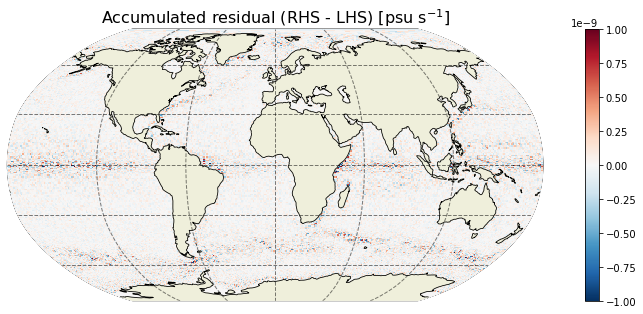

In [94]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, resSlt,
                              cmin=-1e-9, cmax=1e-9, show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Accumulated residual (RHS - LHS) [psu s$^{-1}$]', fontsize=16)
plt.show()

The above map confirms that the residual (summed over depth and time) is essentially zero everywhere, and the ECCOv4 salt budget can be closed to machine precision. 

### Salt budget: Spatial distributions

In [95]:
# In order to plot the budget terms in one figure, let's add them in a list
var = [G_total_Slt,G_advection_Slt,G_diffusion_Slt,G_forcing_Slt]
varstrngs = [r'$G^{Slt}_{total}$',r'$G^{Slt}_{advection}$',r'$G^{Slt}_{diffusion}$',r'$G^{Slt}_{forcing}$']

In [96]:
# Set an index for the time (t) and depth (k) axis
t, k = 100, 0

#### Example maps at a particular time and depth level

-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5


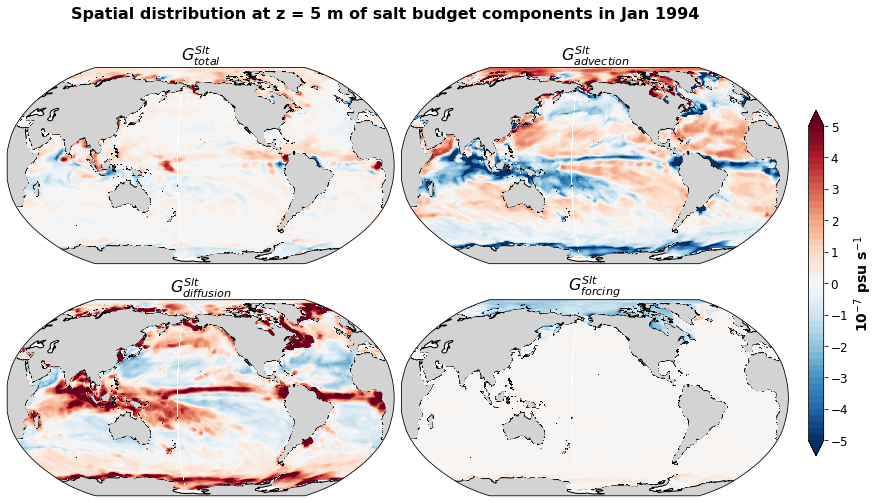

In [104]:
axes_class = (GeoAxes,dict(map_projection=cartopy.crs.Robinson(central_longitude=-159)))

fig = plt.figure(figsize=(14,8))
axgr = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 2), axes_pad=(0.1 ,0.5), 
                share_all=True, label_mode='')

for i, ax in enumerate(axgr):
    
    new_grid_lon, new_grid_lat,_,_, field_nearest_1deg =\
                    ecco.resample_to_latlon(ecco_grid.XC, ecco_grid.YC,
                                            var[i].isel(time=t,k=k),
                                            new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                            new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                            fill_value = np.NaN, mapping_method = 'nearest_neighbor',
                                            radius_of_influence = 120000)
    
    ax.coastlines(linewidth=1.0)
    ax.add_feature(cartopy.feature.LAND,color='lightgrey')
    ax.set_title(varstrngs[i],fontsize=16)
    p = ax.contourf(new_grid_lon, new_grid_lat, field_nearest_1deg*1e7, transform=cartopy.crs.PlateCarree(), 
                    vmin=-5, vmax=5, cmap='RdBu_r', levels=np.linspace(-5, 5, 51), extend='both')
    
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(p, cax=cax, orientation='vertical',ticks=np.linspace(-5, 5, 11))
cb.ax.tick_params(labelsize=12)
cb.set_label(r'10$^{-7}$ psu s$^{-1}$', fontsize=14, fontweight='bold')
fig.suptitle('Spatial distribution at z = %i m of salt budget components in '\
             %np.round(-ecco_grid.Z[k].values)+str(ds.time[t].dt.strftime("%b %Y").values),
             fontsize=16, fontweight='bold')

plt.show()

#### Time-mean distribution

-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5


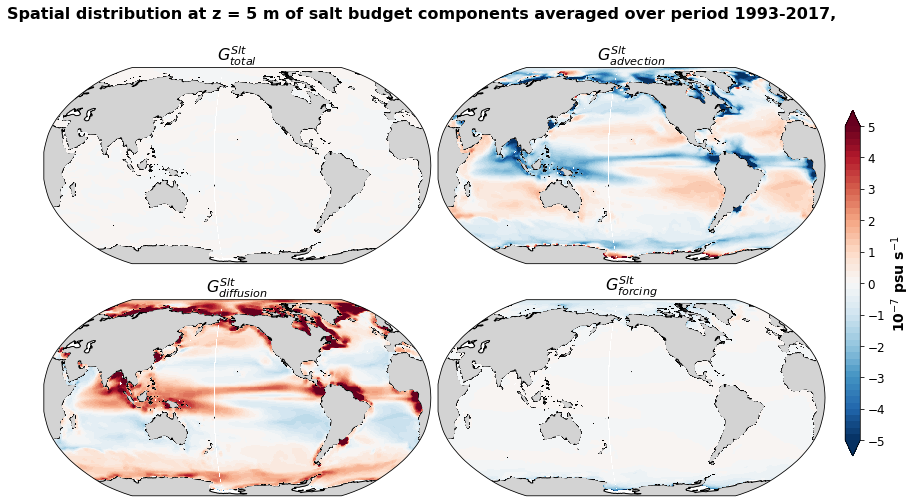

In [98]:
axes_class = (GeoAxes,dict(map_projection=cartopy.crs.Robinson(central_longitude=-159)))

fig = plt.figure(figsize=(14,8))
fig.suptitle('Spatial distribution at z = %i m of salt budget components averaged over period %i-%i,'\
             %(np.round(-ecco_grid.Z[k].values),year_start,year_end),
             fontsize=16, fontweight='bold')
axgr = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 2), axes_pad=(0.1 ,0.5), 
                share_all=True, label_mode='')

for i, ax in enumerate(axgr):
    
    new_grid_lon, new_grid_lat, _,_,field_nearest_1deg =\
                    ecco.resample_to_latlon(ecco_grid.XC, ecco_grid.YC,
                                            var[i].mean('time').isel(k=k),
                                            new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                            new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                            fill_value = np.NaN, mapping_method = 'nearest_neighbor',
                                            radius_of_influence = 120000)
    
    ax.coastlines(linewidth=1.0)
    ax.add_feature(cartopy.feature.LAND,color='lightgrey')
    ax.set_title(varstrngs[i],fontsize=16)
    p = ax.contourf(new_grid_lon, new_grid_lat, field_nearest_1deg*1e7, transform=cartopy.crs.PlateCarree(), 
                    vmin=-5, vmax=5, cmap='RdBu_r', levels=np.linspace(-5, 5, 51), extend='both')
    
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(p, cax=cax, orientation='vertical',ticks=np.linspace(-5, 5, 11))
cb.ax.tick_params(labelsize=12)
cb.set_label(r'10$^{-7}$ psu s$^{-1}$', fontsize=14, fontweight='bold')
plt.show()

From the maps above, we can see that the balance in the salt budget is mostly between the advective and diffusive convergence, and the forcing term is only relevant close to the sea ice edge.

### Salt budget closure through time

#### Global average budget closure

In [99]:
# Take volume-weighted mean of these terms
tmp_a1 = (G_total_Slt*vol).sum(dim=('k','i','j','tile'))/vol.sum()
tmp_a2 = (rhs*vol).sum(dim=('k','i','j','tile'))/vol.sum()
tmp_b = (G_advection_Slt*vol).sum(dim=('k','i','j','tile'))/vol.sum()
tmp_c = (G_diffusion_Slt*vol).sum(dim=('k','i','j','tile'))/vol.sum()
tmp_d = (G_forcing_Slt*vol).sum(dim=('k','i','j','tile'))/vol.sum()

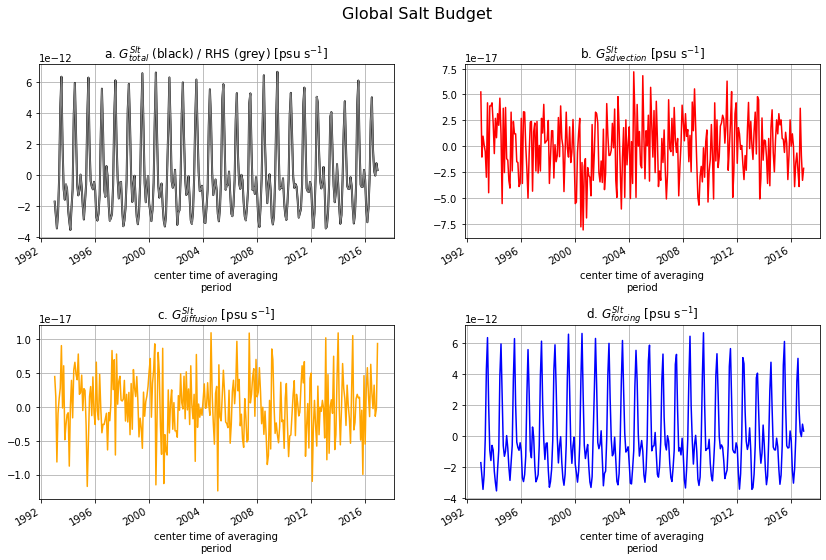

In [100]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))

plt.sca(axs[0,0])
tmp_a1.plot(color='k',lw=2)
tmp_a2.plot(color='grey')
axs[0,0].set_title(r'a. $G^{Slt}_{total}$ (black) / RHS (grey) [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[0,1])
tmp_b.plot(color='r')
axs[0,1].set_title(r'b. $G^{Slt}_{advection}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,0])
tmp_c.plot(color='orange')
axs[1,0].set_title(r'c. $G^{Slt}_{diffusion}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,1])
tmp_d.plot(color='b')
axs[1,1].set_title(r'd. $G^{Slt}_{forcing}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()
plt.subplots_adjust(hspace = .5, wspace=.2)
plt.suptitle('Global Salt Budget', fontsize=16)
plt.show()

The globally-averaged salt budget is driven by the forcing term, which mostly represents the input/output of salt from sea ice melting/freezing.

#### Local salt budget closure

In [30]:
# Pick any set of indices (tile, k, j, i) corresponding to an ocean grid point
t,k,j,i = (12,0,87,16)
print(t,k,j,i)

12 0 87 16


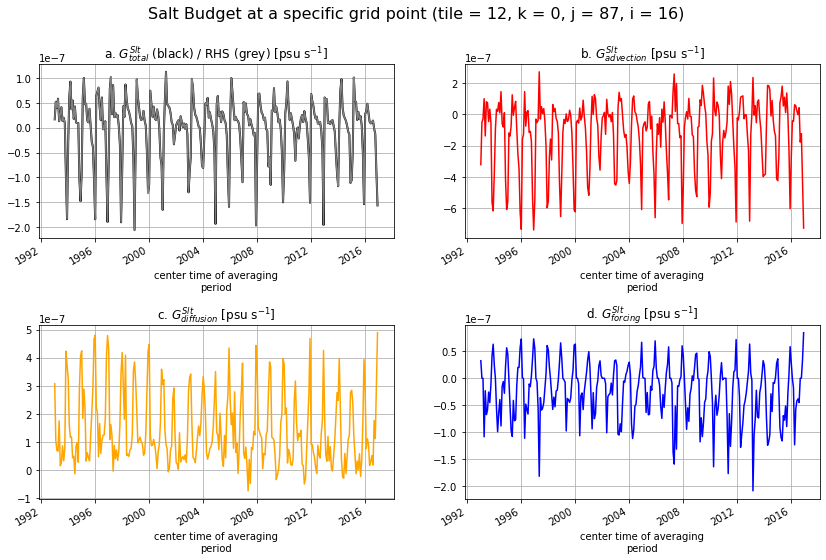

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))

plt.sca(axs[0,0])
G_total_Slt.isel(tile=t,k=k,j=j,i=i).plot(color='k',lw=2)
rhs.isel(tile=t,k=k,j=j,i=i).plot(color='grey')
axs[0,0].set_title(r'a. $G^{Slt}_{total}$ (black) / RHS (grey) [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[0,1])
G_advection_Slt.isel(tile=t,k=k,j=j,i=i).plot(color='r')
axs[0,1].set_title(r'b. $G^{Slt}_{advection}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,0])
G_diffusion_Slt.isel(tile=t,k=k,j=j,i=i).plot(color='orange')
axs[1,0].set_title(r'c. $G^{Slt}_{diffusion}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,1])
G_forcing_Slt.isel(tile=t,k=k,j=j,i=i).plot(color='b')
axs[1,1].set_title(r'd. $G^{Slt}_{forcing}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()
plt.subplots_adjust(hspace = .5, wspace=.2)
plt.suptitle('Salt Budget at a specific grid point (tile = %i, k = %i, j = %i, i = %i)'%(t,k,j,i), fontsize=16)

plt.show()

The balance looks very different for the local salt budget of a specific grid point. We see much greater magnitudes, mostly in the advective and diffusive part. The forcing component is an order of magnitude smaller than $G^{Slt}_{advection}$ and $G^{Slt}_{diffusion}$ and only relevant when sea ice is melting/freezing.

### Vertical profiles of the salt budget terms

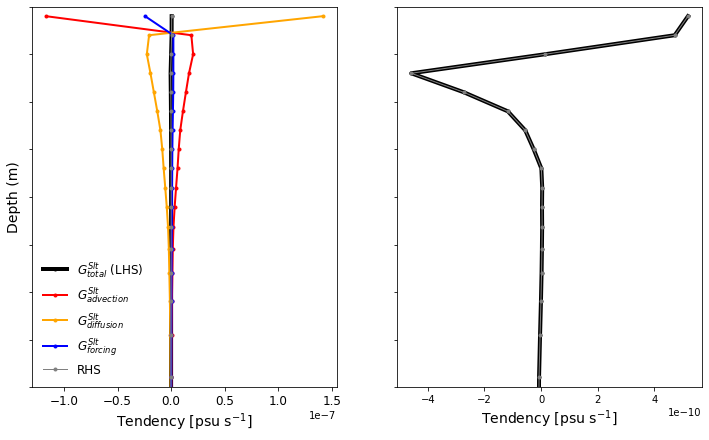

In [103]:
fig = plt.subplots(1, 2, sharey=True, figsize=(12,7))

plt.subplot(1, 2, 1)
plt.plot(G_total_Slt.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z,
         lw=4, color='black', marker='.', label=r'$G^{Slt}_{total}$ (LHS)')

plt.plot(G_advection_Slt.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z, 
         lw=2, color='red', marker='.', label=r'$G^{Slt}_{advection}$')

plt.plot(G_diffusion_Slt.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z, 
         lw=2, color='orange', marker='.', label=r'$G^{Slt}_{diffusion}$')

plt.plot(G_forcing_Slt.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z, 
         lw=2, color='blue', marker='.', label=r'$G^{Slt}_{forcing}$')
plt.plot(rhs.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z, lw=1, color='grey', marker='.', label='RHS')
plt.xlabel(r'Tendency [psu s$^{-1}$]', fontsize=14)
plt.ylim([-200,0])
plt.ylabel('Depth (m)', fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='lower left', frameon=False, fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(G_total_Slt.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z,
         lw=4, color='black', marker='.', label=r'$G^{Slt}_{total}$ (LHS)')
plt.plot(rhs.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z, lw=1, color='grey', marker='.', label='RHS')
plt.setp(plt.gca(), 'yticklabels',[])
plt.xlabel(r'Tendency [psu s$^{-1}$]', fontsize=14)
plt.ylim([-200,0])
plt.show()

The above examples illustrate that we can close the salt budget globally/spatially averaged, locally (for each grid point) at a specific time or averaged over time.

Given the nonlinear free surface condition, budgets for salt content (an extensive quantity) are not the same as budgets for salinity (an intensive quantity). The surface freshwater exchanges do not enter into the salt budget, since such fluxes do not affect the overall salt content, but rather make it more or less concentrated. However, a budget for salinity can be derived based on the conservation equations for salt and volume, and estimated using diagnostic model output. Such details are given in the section below.

## Evaluating the salinity budget
In this section, we demonstrate how to estimate the salinity budget using output from the ECCOv4 solution. Each term in the following salinity budget equation will be evaluated.

$$G^{Sln}_\textrm{total} = G^{Sln}_\textrm{advection} + G^{Sln}_\textrm{diffusion} + G^{Sln}_\textrm{forcing}$$

### Scale factor
Closing the salinity budget requires accurate estimates of volume changes for each grid cell. Thus, we need to explicitly calculate the scale factor ($s^*$) to be used in our calculations below.
$$s^* = 1 + \frac{\eta}{H}$$

This requires following model output:
- `Depth`: Ocean depth, $H$ (m)
- `ETAN`: Surface Height Anomaly, $\eta$ (m)

In [33]:
# Scale factor
rstarfac = ((ecco_grid.Depth + ecco_monthly_mean.ETAN)/ecco_grid.Depth)

### Total salinity tendency
We calculate the monthly-averaged time tendency of salinity by differencing monthly `SALT` snapshots. This operation includes dividing by the number of seconds between each snapshot.
$$G^{Sln}_\textrm{total} = \frac{\Delta S}{\Delta t}$$

In [38]:
# Total tendency (psu/s)
G_total_Sln = grid.diff(ds.SALT_snp, 'T', boundary='fill', fill_value=0.0)/delta_t

### Advective salinity convergence
Based on the derivation in the Introduction section, the salinity budget requires terms from both the volume and salt budgets. For the advective convergence of salinity, we first need to derive the convergence of volume.

#### Horizontal convergence
Relevant model output:
- `UVELMASS`: U Mass-Weighted Component of Velocity (m/s)
- `VVELMASS`: V Mass-Weighted Component of Velocity (m/s)

In [39]:
# Horizontal volume transports (m^3/s)
u_transport = ds.UVELMASS * ecco_grid.dyG * ecco_grid.drF
v_transport = ds.VVELMASS * ecco_grid.dxG * ecco_grid.drF

uv_diff = grid.diff_2d_vector({'X' : u_transport, 'Y' : v_transport}, boundary = 'fill')

# Convergence of the horizontal flow (m^3/s)
hConvV = -(uv_diff['X'] + uv_diff['Y'])

Advective convergence of salinity has two parts: the advective salt flux (`adv_hConvS`), and the tendency due to volume convergence (`hConvV`).

In [40]:
# Horizontal convergence of salinity (m^3/s)
adv_hConvSln = (-ds.SALT*hConvV + adv_hConvS)/rstarfac

#### Vertical convergence
Relevant model output:
- `WVELMASS`: Vertical Mass-Weighted Component of Velocity (m/s)
> Note: `WVELMASS[k=0] == -oceFWflx/rho0`. If we don't zero out the top cell, we end up double counting the surface flux.

In [41]:
# Vertical volume transport (m^3/s)
w_transport = ds.WVELMASS.where(ds.k_l>0).fillna(0.) * ecco_grid.rA

In [42]:
# Convergence of the vertical flow (m^3/s)
vConvV = grid.diff(w_transport, 'Z', boundary='fill')

Again, to get the vertical convergence of salinity we need both the vertical salt flux (`adv_vConvS`) and convergece of vertical flow (`vConvV`).

In [43]:
# Vertical convergence of salinity (psu m^3/s)
adv_vConvSln = (-ds.SALT*vConvV + adv_vConvS)/rstarfac

#### Total advective salinity convergence

In [44]:
# Total convergence of advective salinity flux (psu/s)
G_advection_Sln = (adv_hConvSln + adv_vConvSln)/vol

### Diffusive salinity convergence
The diffusive flux of salinity is pretty much the same as for salt. The only step is dividing the convergence of salt diffusion by the scale factor.

In [43]:
# Horizontal convergence
dif_hConvSln = dif_hConvS/rstarfac

# Vertical convergence
dif_vConvSln = dif_vConvS/rstarfac

# Sum horizontal and vertical convergences and divide by volume (psu/s)
G_diffusion_Sln = (dif_hConvSln + dif_vConvSln)/vol

### Salinity forcing
The forcing term is comprised of both salt flux (`forcS`) and volume (i.e., surface freshwater) fluxes (`forcV`).
We now require monthly mean salinity `SALT` to convert `forcV` to appropriate units.

#### Volume forcing
- `oceFWflx`: net surface Fresh-Water flux into the ocean (kg/m^2/s)

In [46]:
# Load monthly averaged freshwater flux and add vertical coordinate
oceFWflx = ds.oceFWflx.assign_coords(k=0).expand_dims('k')

# Sea surface forcing on volume (1/s)
forcV = xr.concat([(oceFWflx/rhoconst)/(ecco_grid.hFacC*ecco_grid.drF), 
                   xr.zeros_like((oceFWflx[0]/rhoconst)/(ecco_grid.hFacC*ecco_grid.drF).isel(k=slice(1,None)))], 
                  dim='k')

In [47]:
# Sea surface forcing for salinity (psu/s)
G_forcing_Sln = (-ds.SALT*forcV + G_forcing_Slt)/rstarfac

### Salinity budget: Map of residual

In [48]:
# Total convergence (psu/s)
ConvSln = G_advection_Sln + G_diffusion_Sln

# Sum of terms in RHS of equation (psu/s)
rhs_Sln = ConvSln + G_forcing_Sln

In [105]:
# Accumulated residual
resSln = (rhs_Sln-G_total_Sln).sum(dim='k').sum(dim='time').compute()

-179.9 179.9
-180.0 180.0
-89.9 89.9
-90.0 90.0


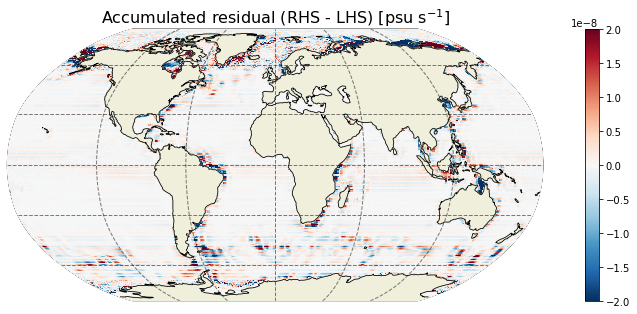

In [106]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, resSln,
                              cmin=-2e-8, cmax=2e-8, show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Accumulated residual (RHS - LHS) [psu s$^{-1}$]', fontsize=16)
plt.show()

The residual in the salinity budget are more extensive compared to the salt budget. Here errors occur that are mostly found in the continental shelves and high latitudes. However, given that the above map shows the accumulated residual, the errors are very small compared to the salinity tendencies' overall range of values.

### Salinity budget: Spatial distributions

In [107]:
# In order to plot the budget terms in one figure, let's add them in a list
var = [G_total_Sln,G_advection_Sln,G_diffusion_Sln,G_forcing_Sln]
varstrngs = [r'$G^{Sln}_{total}$',r'$G^{Sln}_{advection}$',r'$G^{Sln}_{diffusion}$',r'$G^{Sln}_{forcing}$']

In [108]:
# Set an index for the time (t) and depth (k) axis
t, k = 100, 0

#### Example maps at a particular time and depth level

-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5


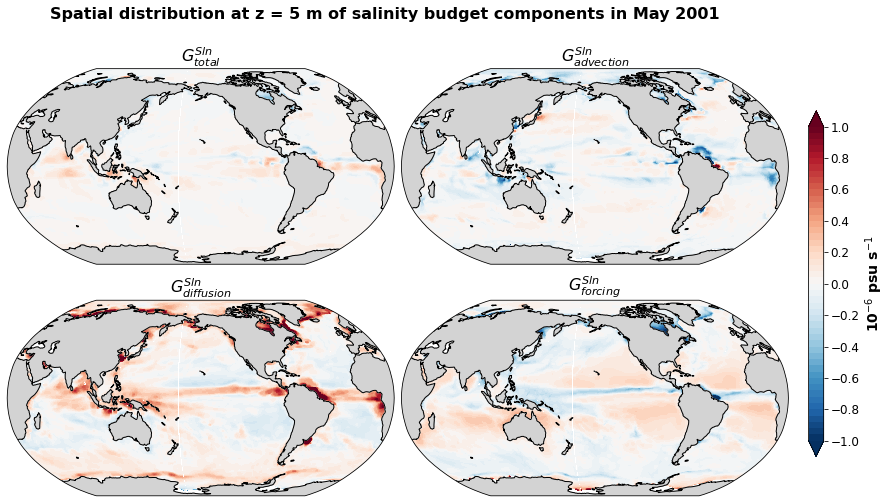

In [109]:
axes_class = (GeoAxes,dict(map_projection=cartopy.crs.Robinson(central_longitude=-159)))

fig = plt.figure(figsize=(14,8))
fig.suptitle('Spatial distribution at z = %i m of salinity budget components in '\
             %np.round(-ecco_grid.Z[k].values)+str(ds.time[t].dt.strftime("%b %Y").values),
             fontsize=16, fontweight='bold')
axgr = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 2), axes_pad=(0.1 ,0.5), 
                share_all=True, label_mode='')

for i, ax in enumerate(axgr):
    
    new_grid_lon, new_grid_lat,_,_, field_nearest_1deg =\
                    ecco.resample_to_latlon(ecco_grid.XC, ecco_grid.YC,
                                            var[i].isel(time=t,k=k),
                                            new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                            new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                            fill_value = np.NaN, mapping_method = 'nearest_neighbor',
                                            radius_of_influence = 120000)
    
    ax.coastlines(linewidth=1.0,zorder=2)
    ax.add_feature(cartopy.feature.LAND,color='lightgrey',zorder=1)
    ax.set_title(varstrngs[i],fontsize=16)
    p = ax.contourf(new_grid_lon, new_grid_lat, field_nearest_1deg*1e6, transform=cartopy.crs.PlateCarree(), 
                    vmin=-1, vmax=1, cmap='RdBu_r', levels=np.linspace(-1, 1, 51), extend='both',zorder=0)
    
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(p, cax=cax, orientation='vertical',ticks=np.linspace(-1, 1, 11))
cb.ax.tick_params(labelsize=12)
cb.set_label(r'10$^{-6}$ psu s$^{-1}$', fontsize=14, fontweight='bold')

plt.show()

#### Time-mean distribution

-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5


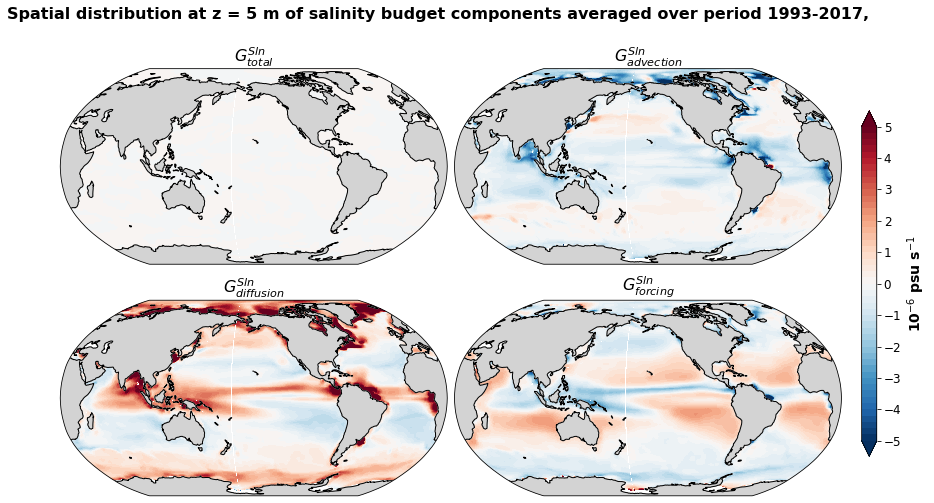

In [110]:
axes_class = (GeoAxes,dict(map_projection=cartopy.crs.Robinson(central_longitude=-159)))

fig = plt.figure(figsize=(14,8))
fig.suptitle('Spatial distribution at z = %i m of salinity budget components averaged over period %i-%i,'\
             %(np.round(-ecco_grid.Z[k].values),year_start,year_end),
             fontsize=16, fontweight='bold')
axgr = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 2), axes_pad=(0.1 ,0.5), 
                share_all=True, label_mode='')

for i, ax in enumerate(axgr):
    
    new_grid_lon, new_grid_lat,_,_, field_nearest_1deg =\
                    ecco.resample_to_latlon(ecco_grid.XC, ecco_grid.YC,
                                            var[i].mean('time').isel(k=k),
                                            new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                            new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                            fill_value = np.NaN, mapping_method = 'nearest_neighbor',
                                            radius_of_influence = 120000)
    
    ax.coastlines(linewidth=1.0,zorder=2)
    ax.add_feature(cartopy.feature.LAND,color='lightgrey',zorder=1)
    ax.set_title(varstrngs[i],fontsize=16)
    p = ax.contourf(new_grid_lon, new_grid_lat, field_nearest_1deg*1e7, transform=cartopy.crs.PlateCarree(), 
                    vmin=-5, vmax=5, cmap='RdBu_r', levels=np.linspace(-5, 5, 51), extend='both',zorder=0)
    
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(p, cax=cax, orientation='vertical',ticks=np.linspace(-5, 5, 11))
cb.ax.tick_params(labelsize=12)
cb.set_label(r'10$^{-6}$ psu s$^{-1}$', fontsize=14, fontweight='bold')
plt.show()

Unlike with the salt budget, we now see a clear spatial pattern in the forcing term, which resembles surface freshwater flux.

### Salinity budget closure through time
This section illustrates that we can close the salinity budget globally and locally (i.e., at any given grid point).

#### Global average budget closure

In [49]:
# Take volume-weighted mean of these terms
tmp_a1 = (G_total_Sln*vol).sum(dim=('k','i','j','tile'))/vol.sum()
tmp_a2 = (rhs_Sln*vol).sum(dim=('k','i','j','tile'))/vol.sum()
tmp_b = (G_advection_Sln*vol).sum(dim=('k','i','j','tile'))/vol.sum()
tmp_c = (G_diffusion_Sln*vol).sum(dim=('k','i','j','tile'))/vol.sum()
tmp_d = (G_forcing_Sln*vol).sum(dim=('k','i','j','tile'))/vol.sum()

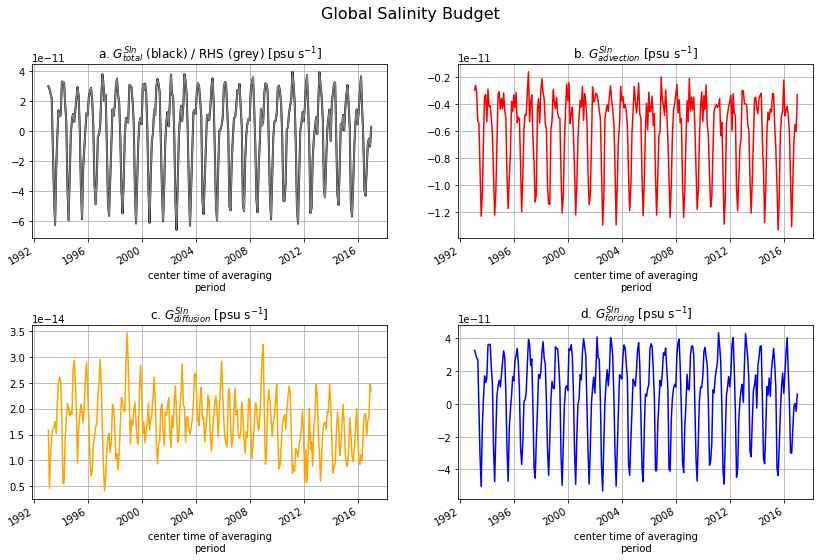

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))

plt.sca(axs[0,0])
tmp_a1.plot(color='k',lw=2)
tmp_a2.plot(color='grey')
axs[0,0].set_title(r'a. $G^{Sln}_{total}$ (black) / RHS (grey) [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[0,1])
tmp_b.plot(color='r')
axs[0,1].set_title(r'b. $G^{Sln}_{advection}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,0])
tmp_c.plot(color='orange')
axs[1,0].set_title(r'c. $G^{Sln}_{diffusion}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,1])
tmp_d.plot(color='b')
axs[1,1].set_title(r'd. $G^{Sln}_{forcing}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()
plt.subplots_adjust(hspace = .5, wspace=.2)
plt.suptitle('Global Salinity Budget', fontsize=16)
plt.show()

#### Local salinity budget closure

In [51]:
# Pick any set of indices (tile, k, j, i) corresponding to an ocean grid point
t,k,j,i = (12,0,87,16)
print(t,k,j,i)

12 0 87 16


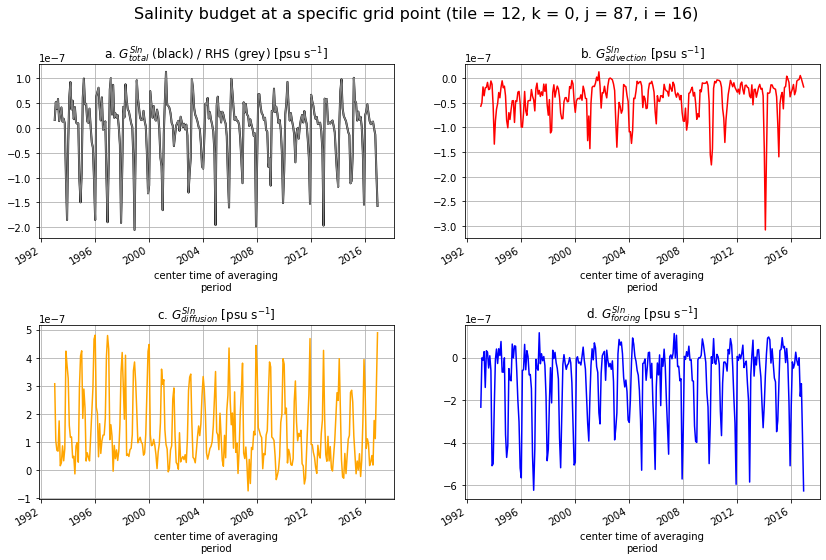

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))

plt.sca(axs[0,0])
G_total_Sln.isel(tile=t,k=k,j=j,i=i).plot(color='k',lw=2)
rhs_Sln.isel(tile=t,k=k,j=j,i=i).plot(color='grey')
axs[0,0].set_title(r'a. $G^{Sln}_{total}$ (black) / RHS (grey) [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[0,1])
G_advection_Sln.isel(tile=t,k=k,j=j,i=i).plot(color='r')
axs[0,1].set_title(r'b. $G^{Sln}_{advection}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,0])
G_diffusion_Sln.isel(tile=t,k=k,j=j,i=i).plot(color='orange')
axs[1,0].set_title(r'c. $G^{Sln}_{diffusion}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,1])
G_forcing_Sln.isel(tile=t,k=k,j=j,i=i).plot(color='b')
axs[1,1].set_title(r'd. $G^{Sln}_{forcing}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()
plt.subplots_adjust(hspace = .5, wspace=.2)
plt.suptitle('Salinity budget at a specific grid point (tile = %i, k = %i, j = %i, i = %i)'%(t,k,j,i), fontsize=16)

plt.show()

### Vertical profiles of the salinity budget terms

This section illustrates the balance in the salinity budget along the depth axis.

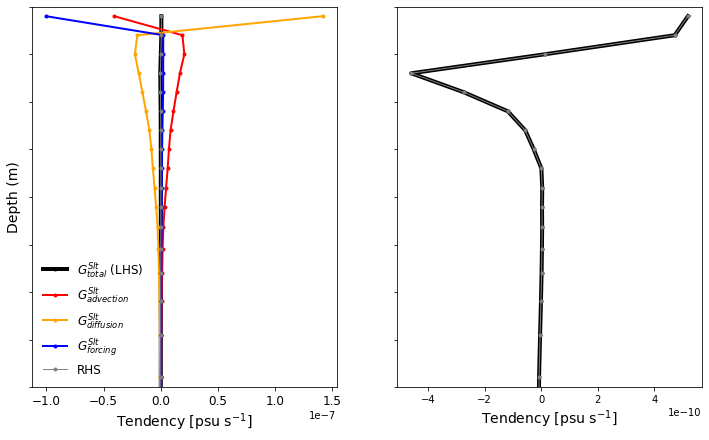

In [53]:
fig = plt.subplots(1, 2, sharey=True, figsize=(12,7))

plt.subplot(1, 2, 1)
plt.plot(G_total_Sln.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z,
         lw=4, color='black', marker='.', label=r'$G^{Slt}_{total}$ (LHS)')

plt.plot(G_advection_Sln.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z, 
         lw=2, color='red', marker='.', label=r'$G^{Slt}_{advection}$')

plt.plot(G_diffusion_Sln.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z, 
         lw=2, color='orange', marker='.', label=r'$G^{Slt}_{diffusion}$')

plt.plot(G_forcing_Sln.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z, 
         lw=2, color='blue', marker='.', label=r'$G^{Slt}_{forcing}$')
plt.plot(rhs_Sln.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z, lw=1, color='grey', marker='.', label='RHS')
plt.xlabel(r'Tendency [psu s$^{-1}$]', fontsize=14)
plt.ylim([-200,0])
plt.ylabel('Depth (m)', fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='lower left', frameon=False, fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(G_total_Sln.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z,
         lw=4, color='black', marker='.', label=r'$G^{Slt}_{total}$ (LHS)')
plt.plot(rhs_Sln.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z, lw=1, color='grey', marker='.', label='RHS')
plt.setp(plt.gca(), 'yticklabels',[])
plt.xlabel(r'Tendency [psu s$^{-1}$]', fontsize=14)
plt.ylim([-200,0])
plt.show()

## Evaluating the freshwater budget 

Fresh water is defined as:

$fw = \frac{S_{ref} - S}{S_{ref}},$

where $S$ is salinity, $S_{ref}$ is a reference value.

As with the salt and a salinity budget we will evaluate each term in the freshwater budget. 

$G^{fw}_\textrm{total} = G^{fw}_\textrm{advection} + G^{fw}_\textrm{diffusion} + G^{fw}_\textrm{forcing}$

Each term is largely analagous to the salinity budget (including the scale factor $s^*$ to account for volume changes), except that we must calculate $G^{fw}_\textrm{diffusion}$ as the residual of the other terms. We will then compare with $G^{Sln}_\textrm{diffusion}$.

In [23]:
# Reference salinity
Sref = 35.0

### Total freshwater tendency

As with salinity, we calculated the monthly-averaged time tendancy of freshwater by differencing monthly snapshots.

In [24]:
f = (Sref - ds.SALT_snp)/Sref

G_total_Fw_month = grid.diff(f, 'T', boundary='fill', fill_value=0.0)

In [25]:
# Total freshwater tendency (m^3/s)
G_total_Fw = G_total_Fw_month*vol/delta_t

### Advective flux of freshwater

Advective fluxes of freshwater are calculated offline using salinity and velocity fields to calculate the volume convergence of freshwater:

\begin{equation}\label{Fw_adv}
\mathbf{\mathcal{F}_{adv}} = \iint_A\mathbf{u}_{res} \cdot \left(\frac{S_{ref} - S}{S_{ref}}\right)dA
\end{equation}

$u_{res}$ is the residual mean velocity field, which contains both the resolved (Eulerian), as well as the Gent-McWilliams bolus velocity (i.e., the parameterization of unresolved eddy effects).

#### GM Bolus Velocity

In [26]:
UVELSTAR = grid.diff(ds.GM_PsiX, 'Z', boundary='fill')/ecco_grid.drF
VVELSTAR = grid.diff(ds.GM_PsiY, 'Z', boundary='fill')/ecco_grid.drF

In [27]:
GM_PsiXY_diff = grid.diff_2d_vector({'X' : ds.GM_PsiX*ecco_grid.dyG, 
                                     'Y' : ds.GM_PsiY*ecco_grid.dxG}, boundary = 'fill')
WVELSTAR = (GM_PsiXY_diff['X'] + GM_PsiXY_diff['Y'])/ecco_grid.rA

#### Calculate advective freshwater flux

In [28]:
SALT_at_u = grid.interp(ds.SALT, 'X', boundary='extend')
SALT_at_v = grid.interp(ds.SALT, 'Y', boundary='extend')
SALT_at_w = grid.interp(ds.SALT, 'Z', boundary='extend')

As with the salinity budget, we zero out the top cell of `WVELMASS` to avoid double counting the surface flux

In [29]:
# Freshwater advective (Eulerian+Bolus) fluxes (m^3/s)
ADVx_FW = (ds.UVELMASS+UVELSTAR)*ecco_grid.dyG*ecco_grid.drF*(Sref-SALT_at_u)/Sref
ADVy_FW = (ds.VVELMASS+VVELSTAR)*ecco_grid.dxG*ecco_grid.drF*(Sref-SALT_at_v)/Sref
ADVr_FW = (ds.WVELMASS.where(ds.k_l>0).fillna(0.)+WVELSTAR)*ecco_grid.rA*(Sref-SALT_at_w)/Sref

In [30]:
ADVxy_diff = grid.diff_2d_vector({'X' : ADVx_FW, 'Y' : ADVy_FW}, boundary = 'fill')

# Convergence of horizontal advection (m^3/s)
adv_hConvFw = (-(ADVxy_diff['X'] + ADVxy_diff['Y']))

In [31]:
# Convergence of vertical advection (m^3/s)
adv_vConvFw = grid.diff(ADVr_FW, 'Z', boundary='fill')

In [34]:
# Sum horizontal and vertical convergences (m^3/s)
G_advection_Fw = (adv_hConvFw + adv_vConvFw)/rstarfac

### Freshwater forcing

Include salinity forcing as follows:
$ \frac{\partial fw}{\partial t} = -\frac{1}{S_{ref}}\frac{\partial S}{\partial t} $

so $G^{fw}_\textrm{forcing}= -\frac{1}{S_{ref}} G^{Sln}_\textrm{forcing}$

In [35]:
# Freshwater forcing (m^3/s)
forcFw = ds.oceFWflx/rhoconst*ecco_grid.rA

# Expand to fully 3d (using G_advection_Fw as template)
forcing_Fw = xr.concat([forcFw.reset_coords(drop=True).assign_coords(k=0).expand_dims('k'),
                          xr.zeros_like(G_advection_Fw).isel(k=slice(1,None))],
                         dim='k').where(ecco_grid.hFacC==1)
# Sum FW and Salinity forcing, changing G_forcing_Slt from [m psu/s] to [m^3/s]
G_forcing_Fw = (forcing_Fw-G_forcing_Slt*ecco_grid.rA/rhoconst/Sref)/rstarfac

### Diffusive freshwater flux

We calculate the diffusive freshwater flux as the residuals of the remaining budget terms as this term is not output by ECCO

In [36]:
# Convergence of freshwater diffusion (m^3/s)
G_diffusion_Fw = G_total_Fw - G_forcing_Fw - G_advection_Fw

### Freshwater budget: Spatial distributions

In [37]:
# In order to plot the budget terms in one figure, let's add them in a list
var = [G_total_Fw,G_advection_Fw,G_diffusion_Fw,G_forcing_Fw]
varstrngs = [r'$G^{Fw}_{total}$',r'$G^{Fw}_{advection}$',r'$G^{Fw}_{diffusion}$',r'$G^{Fw}_{forcing}$']

In [38]:
# Set an index for the time (t) and depth (k) axis
t, k = 100, 0

#### Example maps at a particular time and depth level

-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5


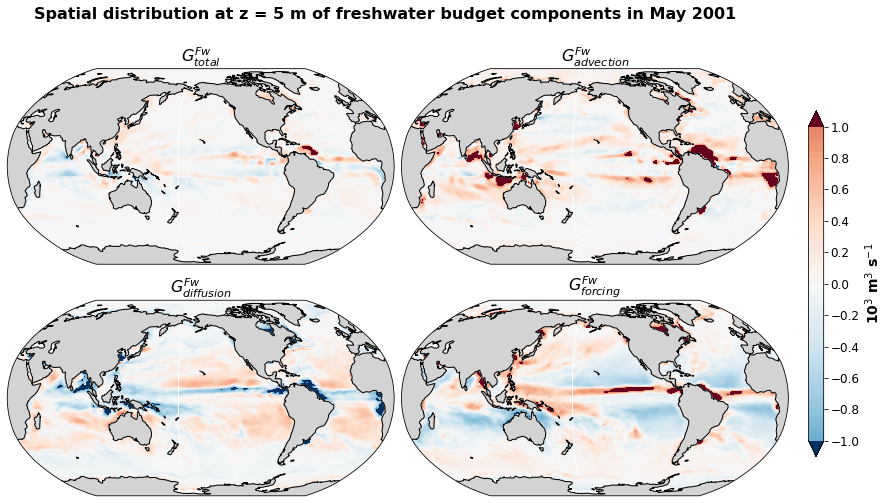

In [101]:
axes_class = (GeoAxes,dict(map_projection=cartopy.crs.Robinson(central_longitude=-159)))

fig = plt.figure(figsize=(14,8))
fig.suptitle('Spatial distribution at z = %i m of freshwater budget components in '\
             %np.round(-ecco_grid.Z[k].values)+str(ds.time[t].dt.strftime("%b %Y").values),
             fontsize=16, fontweight='bold')
axgr = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 2), axes_pad=(0.1 ,0.5), 
                share_all=True, label_mode='')

for i, ax in enumerate(axgr):
    
    new_grid_lon, new_grid_lat,_,_, field_nearest_1deg =\
                    ecco.resample_to_latlon(ecco_grid.XC, ecco_grid.YC,
                                            var[i].isel(time=t,k=k),
                                            new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                            new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                            fill_value = np.NaN, mapping_method = 'nearest_neighbor',
                                            radius_of_influence = 120000)
    
    ax.coastlines(linewidth=1.0,zorder=2)
    ax.add_feature(cartopy.feature.LAND,color='lightgrey',zorder=1)
    ax.set_title(varstrngs[i],fontsize=16)
    p = ax.contourf(new_grid_lon, new_grid_lat, field_nearest_1deg/1e3, transform=cartopy.crs.PlateCarree(), 
                    vmin=-2, vmax=2, cmap='RdBu_r', levels=np.linspace(-1, 1, 51), extend='both',zorder=0)
    
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(p, cax=cax, orientation='vertical',ticks=np.linspace(-1, 1, 11))
cb.ax.tick_params(labelsize=12)
cb.set_label(r'10$^{3}$ m$^3$ s$^{-1}$', fontsize=14, fontweight='bold')

plt.show()

#### Time-mean distribution

-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5
-179.0 179.0
-179.5 179.5
-89.0 89.0
-89.5 89.5


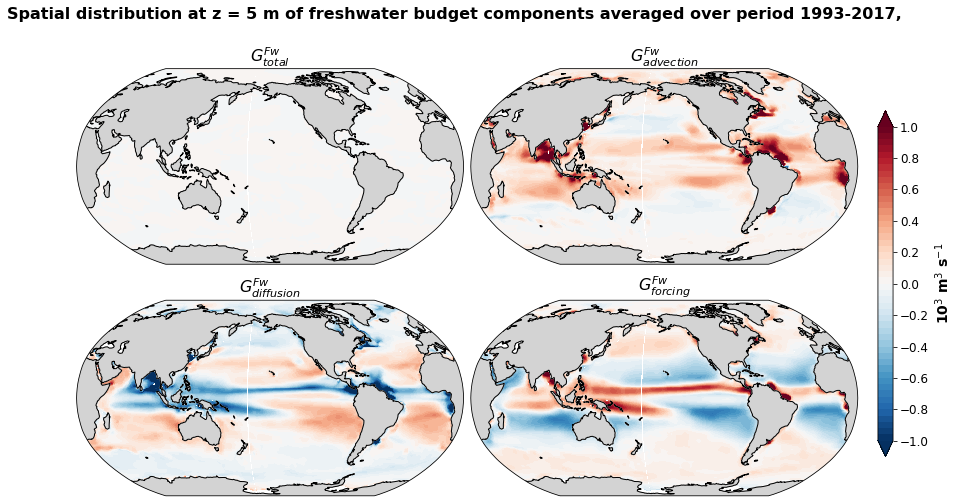

In [103]:
axes_class = (GeoAxes,dict(map_projection=cartopy.crs.Robinson(central_longitude=-159)))

fig = plt.figure(figsize=(14,8))
fig.suptitle('Spatial distribution at z = %i m of freshwater budget components averaged over period %i-%i,'\
             %(np.round(-ecco_grid.Z[k].values),year_start,year_end),
             fontsize=16, fontweight='bold')
axgr = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 2), axes_pad=(0.1 ,0.5), 
                share_all=True, label_mode='')

for i, ax in enumerate(axgr):
    
    new_grid_lon, new_grid_lat,_,_, field_nearest_1deg =\
                    ecco.resample_to_latlon(ecco_grid.XC, ecco_grid.YC,
                                            var[i].mean('time').isel(k=k),
                                            new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                            new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                            fill_value = np.NaN, mapping_method = 'nearest_neighbor',
                                            radius_of_influence = 120000)
    
    ax.coastlines(linewidth=1.0,zorder=2)
    ax.add_feature(cartopy.feature.LAND,color='lightgrey',zorder=1)
    ax.set_title(varstrngs[i],fontsize=16)
    p = ax.contourf(new_grid_lon, new_grid_lat, field_nearest_1deg/1e3, transform=cartopy.crs.PlateCarree(), 
                    vmin=-1, vmax=1, cmap='RdBu_r', levels=np.linspace(-1, 1, 51), extend='both',zorder=0)
    
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(p, cax=cax, orientation='vertical',ticks=np.linspace(-1, 1, 11))
cb.ax.tick_params(labelsize=12)
cb.set_label(r'10$^{3}$ m$^3$ s$^{-1}$', fontsize=14, fontweight='bold')
plt.show()

### Freshwater budget through time
We cannot evaluate the closure of the fw budget as we have used the residual of available terms to determine the diffusive flux. We can compare how close the derived FW diffusive flux $G^{fw}_\textrm{diffusion}$ is to the scaled Salinity diffusive flux $G^{Sln}_\textrm{diffusion}$ 

#### Global average budget

In [44]:
# Take volume-weighted mean of these terms
tmp_a = (G_total_Fw*vol).sum(dim=('k','i','j','tile'))/vol.sum()
tmp_b = (G_advection_Fw*vol).sum(dim=('k','i','j','tile'))/vol.sum()
tmp_c1 = (G_diffusion_Fw*vol).sum(dim=('k','i','j','tile'))/vol.sum()
tmp_c2 = (-G_diffusion_Sln/Sref*vol*vol).sum(dim=('k','i','j','tile'))/vol.sum()
tmp_d = (G_forcing_Fw*vol).sum(dim=('k','i','j','tile'))/vol.sum()

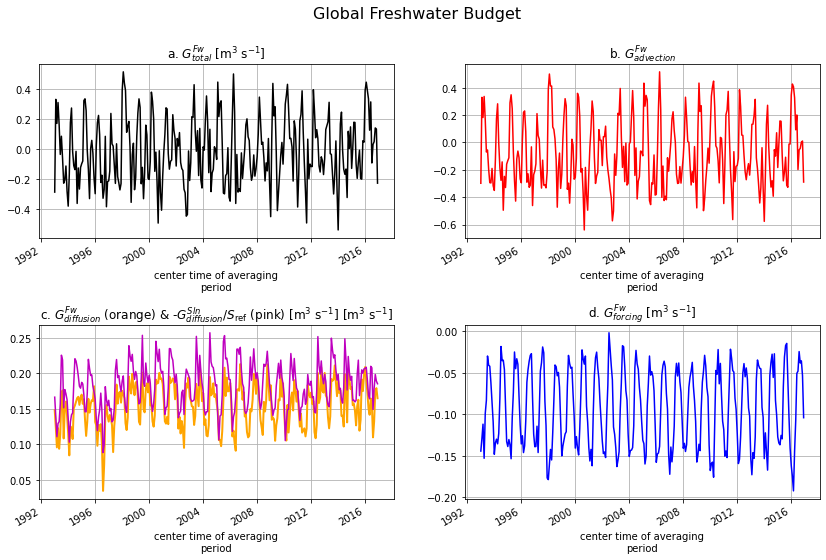

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))

plt.sca(axs[0,0])
tmp_a.plot(color='k')
axs[0,0].set_title(r'a. $G^{Fw}_{total}$ [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[0,1])
tmp_b.plot(color='r')
axs[0,1].set_title(r'b. $G^{Fw}_{advection}$', fontsize=12)
plt.grid()

plt.sca(axs[1,0])
tmp_c1.plot(color='orange',lw=2)
tmp_c2.plot(color='m')
axs[1,0].set_title(r'c. $G^{Fw}_{diffusion}$ (orange) & -$G^{Sln}_{diffusion}$/$S_{\mathrm{ref}}$ (pink) [m$^3$ s$^{-1}$] [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,1])
tmp_d.plot(color='b')
axs[1,1].set_title(r'd. $G^{Fw}_{forcing}$ [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()
plt.subplots_adjust(hspace = .5, wspace=.2)
plt.suptitle('Global Freshwater Budget', fontsize=16)
plt.show()

#### Local freshwater budget closure

In [46]:
# Pick any set of indices (tile, k, j, i) corresponding to an ocean grid point
t,k,j,i = (12,0,87,16)
print(t,k,j,i)

12 0 87 16


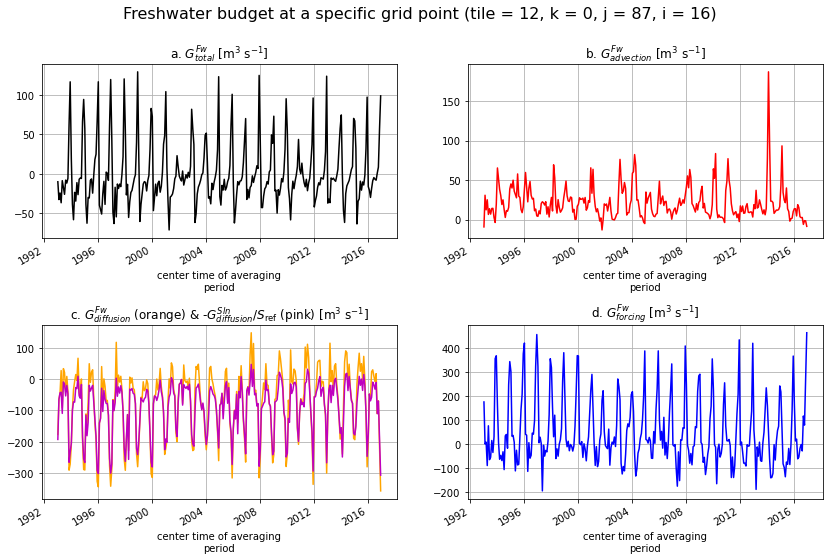

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))

plt.sca(axs[0,0])
G_total_Fw.isel(tile=t,k=k,j=j,i=i).plot(color='k')
axs[0,0].set_title(r'a. $G^{Fw}_{total}$ [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[0,1])
G_advection_Fw.isel(tile=t,k=k,j=j,i=i).plot(color='r')
axs[0,1].set_title(r'b. $G^{Fw}_{advection}$ [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,0])
G_diffusion_Fw.isel(tile=t,k=k,j=j,i=i).plot(color='orange')
(-G_diffusion_Sln*vol/Sref).isel(tile=t,k=k,j=j,i=i).plot(color='m')
axs[1,0].set_title(r'c. $G^{Fw}_{diffusion}$ (orange) & -$G^{Sln}_{diffusion}$/$S_{\mathrm{ref}}$ (pink) [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,1])
G_forcing_Fw.isel(tile=t,k=k,j=j,i=i).plot(color='b')
axs[1,1].set_title(r'd. $G^{Fw}_{forcing}$ [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()
plt.subplots_adjust(hspace = .5, wspace=.2)
plt.suptitle('Freshwater budget at a specific grid point (tile = %i, k = %i, j = %i, i = %i)'%(t,k,j,i), fontsize=16)

plt.show()

### Vertical profiles of the freshwater budget terms

This section illustrates the balance in the freshwater budget along the depth axis.

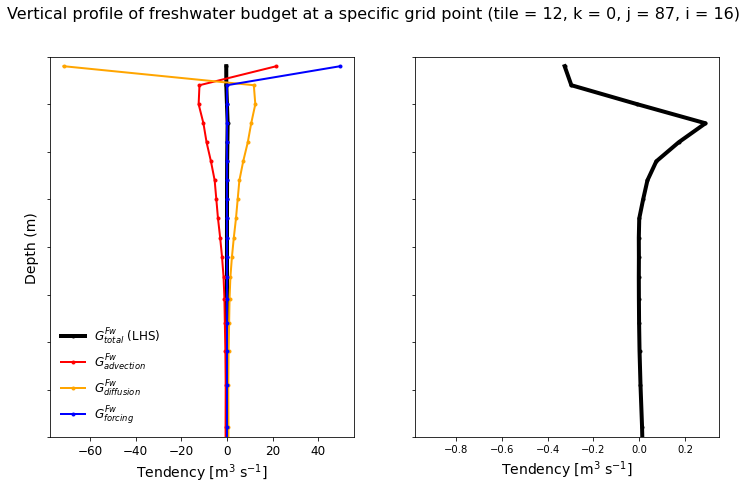

In [110]:
fig = plt.subplots(1, 2, sharey=True, figsize=(12,7))

plt.subplot(1, 2, 1)
plt.plot(G_total_Fw.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z,
         lw=4, color='black', marker='.', label=r'$G^{Fw}_{total}$ (LHS)')

plt.plot(G_advection_Fw.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z, 
         lw=2, color='red', marker='.', label=r'$G^{Fw}_{advection}$')

plt.plot(G_diffusion_Fw.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z, 
         lw=2, color='orange', marker='.', label=r'$G^{Fw}_{diffusion}$')

plt.plot(G_forcing_Fw.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z, 
         lw=2, color='blue', marker='.', label=r'$G^{Fw}_{forcing}$')

plt.xlabel(r'Tendency [m$^3$ s$^{-1}$]', fontsize=14)
plt.ylim([-200,0])
plt.ylabel('Depth (m)', fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='lower left', frameon=False, fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(G_total_Fw.isel(tile=t,j=j,i=i).mean('time'), ecco_grid.Z,
         lw=4, color='black', marker='.', label=r'$G^{Fw}_{total}$ (LHS)')
plt.setp(plt.gca(), 'yticklabels',[])
plt.xlabel(r'Tendency [m$^3$ s$^{-1}$]', fontsize=14)
plt.ylim([-200,0])
plt.suptitle('Vertical profile of freshwater budget at a specific grid point (tile = %i, k = %i, j = %i, i = %i)'%(t,k,j,i), fontsize=16)

plt.show()

## Save budget terms
Now that we have all the terms evaluated, let's save them to a dataset. Here are two examples:

### Add all variables to a new dataset

In [59]:
#varnames = ['G_total_Slt','G_advection_Slt','G_diffusion_Slt','G_forcing_Slt',
#            'G_total_Sln','G_advection_Sln','G_diffusion_Sln','G_forcing_Sln',
#            'G_total_Fw', 'G_advection_Fw', 'G_diffusion_Fw', 'G_forcing_Fw']
varnames = ['G_total_Sln','G_advection_Sln','G_diffusion_Sln','G_forcing_Sln']
ds = xr.Dataset(data_vars={})
for varname in varnames:
    ds[varname] = globals()[varname].chunk(chunks={'time':1,'tile':13,'k':50,'j':90,'i':90})

In [60]:
ds.time.encoding = {}
ds = ds.reset_coords(drop=True)

### Save to zarr dataset

In [61]:
from dask.diagnostics import ProgressBar

In [62]:
ds

<xarray.Dataset>
Dimensions:          (i: 90, j: 90, k: 50, tile: 13, time: 264)
Coordinates:
  * time             (time) datetime64[ns] 1993-01-16T12:00:00 ... 2014-12-16...
  * tile             (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * k                (k) int32 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * j                (j) int32 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * i                (i) int32 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
Data variables:
    G_total_Sln      (time, tile, k, j, i) float64 dask.array<chunksize=(1, 13, 50, 90, 90), meta=np.ndarray>
    G_advection_Sln  (time, tile, k, j, i) float32 dask.array<chunksize=(1, 13, 50, 90, 90), meta=np.ndarray>
    G_diffusion_Sln  (time, tile, k, j, i) float32 dask.array<chunksize=(1, 13, 50, 90, 90), meta=np.ndarray>
    G_forcing_Sln    (time, tile, k, j, i) float32 dask.array<chunksize=(1, 13, 50, 90, 90), meta=np.ndarray>

In [63]:
with ProgressBar():
    ds.to_zarr(base_dir + '/eccov4r3_budg_Slt_Sln_Fw')

[########################################] | 100% Completed | 12min 42.1s


## Load budget variables from file
After having saved the budget terms to file, let's restart the kernel and load only the relevant data and Python modules.

In [1]:
# Suppress warning messages for a cleaner presentation
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import xarray as xr
import ecco_v4_py as ecco

import matplotlib.pyplot as plt
%matplotlib inline

base_dir = '/mnt/efs/data/ECCOv4-release'
ECCO_dir = base_dir + '/Release3_alt'
grid_dir= ECCO_dir + '/nctiles_grid/'
ecco_grid = ecco.load_ecco_grid_nc(grid_dir, 'ECCOv4r3_grid.nc')
grid = ecco.get_llc_grid(ecco_grid)
# Volume (m^3)
vol = (ecco_grid.rA*ecco_grid.drF*ecco_grid.hFacC).transpose('tile','k','j','i')

data_dir= ECCO_dir + '/nctiles_monthly'
year_start = 1993
year_end = 2015
ecco_monthly_mean = ecco.recursive_load_ecco_var_from_years_nc(data_dir, \
                        vars_to_load=['UVELMASS', 'VVELMASS', 'WVELMASS', 'GM_PsiX', 'GM_PsiY', 'SALT', 'oceFWflx'], 
                                                               years_to_load=range(year_start, year_end))

loading files of  GM_PsiX
loading files of  GM_PsiY
loading files of  SALT
loading files of  UVELMASS
loading files of  VVELMASS
loading files of  WVELMASS
loading files of  oceFWflx


In [2]:
# Load terms from zarr dataset
G_total_Sln = xr.open_zarr(base_dir + '/eccov4r3_budg_Slt_Sln_Fw').G_total_Sln
G_advection_Sln = xr.open_zarr(base_dir + '/eccov4r3_budg_Slt_Sln_Fw').G_advection_Sln
G_diffusion_Sln = xr.open_zarr(base_dir + '/eccov4r3_budg_Slt_Sln_Fw').G_diffusion_Sln
G_forcing_Sln = xr.open_zarr(base_dir + '/eccov4r3_budg_Slt_Sln_Fw').G_forcing_Sln

In [4]:
UVELSTAR = grid.diff(ecco_monthly_mean.GM_PsiX, 'Z', boundary='fill')/ecco_grid.drF
VVELSTAR = grid.diff(ecco_monthly_mean.GM_PsiY, 'Z', boundary='fill')/ecco_grid.drF

GM_PsiXY_diff = grid.diff_2d_vector({'X' : ecco_monthly_mean.GM_PsiX*ecco_grid.dyG, 
                                     'Y' : ecco_monthly_mean.GM_PsiY*ecco_grid.dxG}, boundary = 'fill')
WVELSTAR = (GM_PsiXY_diff['X'] + GM_PsiXY_diff['Y'])/ecco_grid.rA

SALT_at_u = grid.interp(ecco_monthly_mean.SALT, 'X', boundary='extend')
SALT_at_v = grid.interp(ecco_monthly_mean.SALT, 'Y', boundary='extend')
SALT_at_w = grid.interp(ecco_monthly_mean.SALT, 'Z', boundary='extend')

# Remove oceFWflx from WVELMASS
WVELMASS = ecco_monthly_mean.WVELMASS.transpose('time','tile','k_l','j','i')
oceFWflx = ecco_monthly_mean.oceFWflx.assign_coords(k_l=0).expand_dims('k_l').transpose('time','tile','k_l','j','i')

# Seawater density (kg/m^3)
rhoconst = 1029

oceFWflx = (oceFWflx/rhoconst)
WVELMASS = xr.concat([WVELMASS.sel(k_l=0) + oceFWflx, WVELMASS[:,:,1:]], 
                     dim='k_l').transpose('time','tile','k_l','j','i')

# Salinity advective (Eulerian+Bolus) fluxes (psu m^3/s)
ADVx_SLT = (ecco_monthly_mean.UVELMASS+UVELSTAR)*ecco_grid.dyG*ecco_grid.drF*SALT_at_u
#ADVx_SLT = ecco_monthly_mean.UVELMASS*ecco_grid.dyG*ecco_grid.drF*SALT_at_u

ADVy_SLT = (ecco_monthly_mean.VVELMASS+VVELSTAR)*ecco_grid.dxG*ecco_grid.drF*SALT_at_v
#ADVy_SLT = ecco_monthly_mean.VVELMASS*ecco_grid.dxG*ecco_grid.drF*SALT_at_v

ADVr_SLT = (WVELMASS+WVELSTAR)*ecco_grid.rA*SALT_at_w
#ADVr_SLT = WVELMASS*ecco_grid.rA*SALT_at_w

ADVxy_diff = grid.diff_2d_vector({'X' : ADVx_SLT, 'Y' : ADVy_SLT}, boundary = 'fill')
adv_hConvS = (-(ADVxy_diff['X'] + ADVxy_diff['Y']))
adv_vConvS = grid.diff(ADVr_SLT, 'Z', boundary='fill')

G_advection = (adv_hConvS + adv_vConvS)/vol

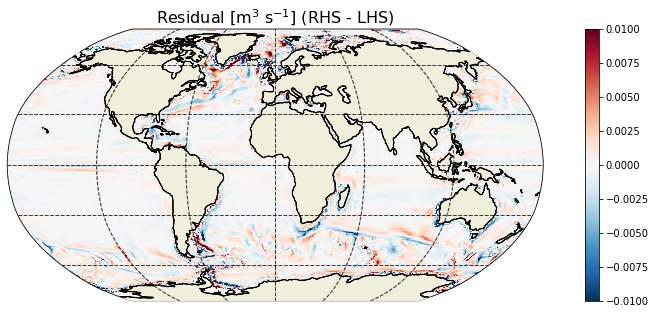

## Comparison between LHS and RHS of the budget equation

In [5]:
# Total convergence
ConvSln = G_advection_Sln + G_diffusion_Sln
ConvSln2 = G_advection     + G_diffusion_Sln

In [6]:
# Sum of terms in RHS of equation
rhsSln = ConvSln + G_forcing_Sln
rhsSln2 = ConvSln2 + G_forcing_Sln

### Map of residuals

In [7]:
resSln =  (G_advection_Sln + G_diffusion_Sln + G_forcing_Sln - G_total_Sln).sum(dim='k').sum(dim='time').compute()
resSln2 = (rhsSln2 - G_total_Sln).sum(dim='k').sum(dim='time').compute()

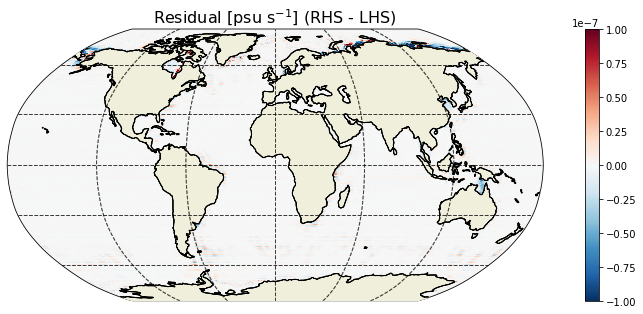

In [8]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, resSln,
                              cmin=-1e-7, cmax=1e-7, show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Residual [psu s$^{-1}$] (RHS - LHS)', fontsize=16)
plt.show()

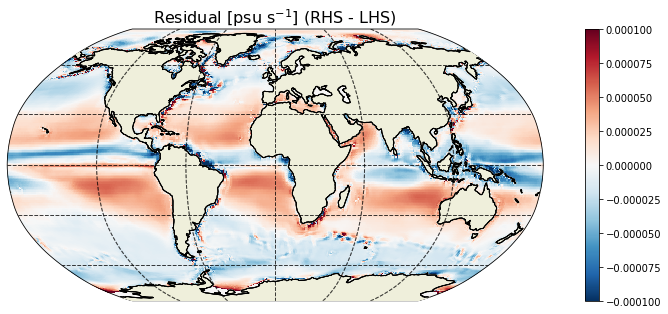

In [20]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, resSln2,
                              cmin=-1e-4, cmax=1e-4, show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Residual [psu s$^{-1}$] (RHS - LHS)', fontsize=16)
plt.show()

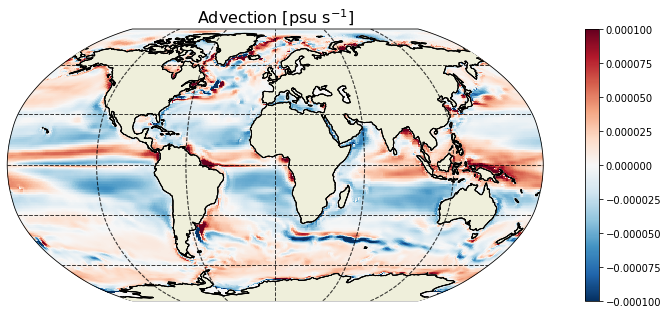

In [21]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, G_advection,\
                              cmin=-1e-4, cmax=1e-4, show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Advection [psu s$^{-1}$]', fontsize=16)
plt.show()

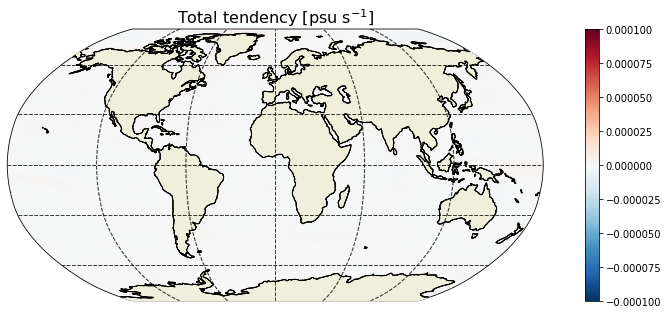

In [22]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, G_total,
                              cmin=-1e-4, cmax=1e-4, show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Total tendency [psu s$^{-1}$]', fontsize=16)
plt.show()

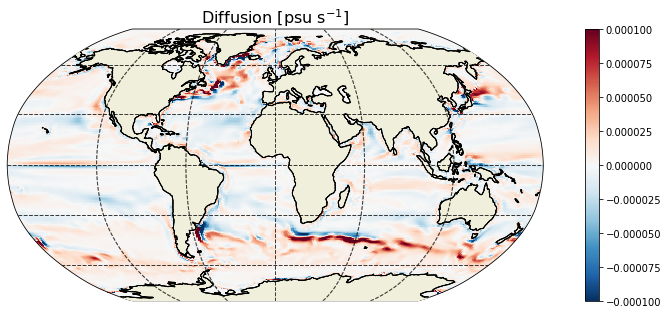

In [23]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, G_diffusion,
                              cmin=-1e-4, cmax=1e-4,show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Diffusion [psu s$^{-1}$]', fontsize=16)
plt.show()

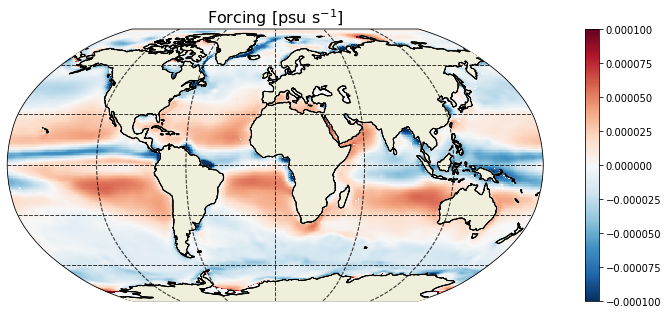

In [24]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, G_forcing,
                              cmin=-1e-4, cmax=1e-4,show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Forcing [psu s$^{-1}$]', fontsize=16)
plt.show()

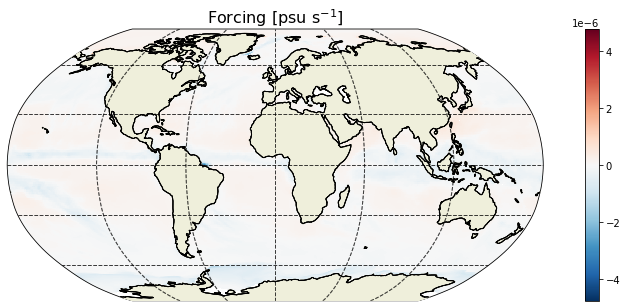

In [88]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, G_forcing_Sln[-1,:,0],
                              show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Forcing [psu s$^{-1}$]', fontsize=16)
plt.show()

<xarray.DataArray 'G_forcing_Sln' (tile: 13, j: 90, i: 90)>
dask.array<getitem, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    k        int32 0
  * tile     (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
    time     datetime64[ns] 2014-12-16T12:00:00

In [35]:
tmp = np.abs(G_advection_Sln + G_diffusion_Sln + G_forcing_Sln - G_total_Sln).values.ravel()

In [52]:
tmp = res_offline.values.ravel()

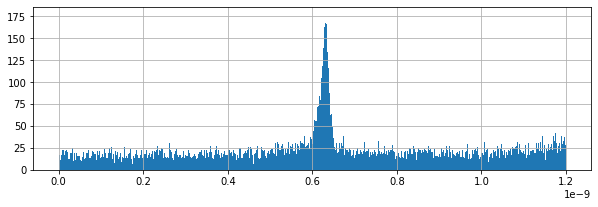

In [53]:
plt.figure(figsize=(10,3));

plt.hist(tmp[np.nonzero(tmp > 0)],np.linspace(0, 1.2e-9,1000));
plt.grid()

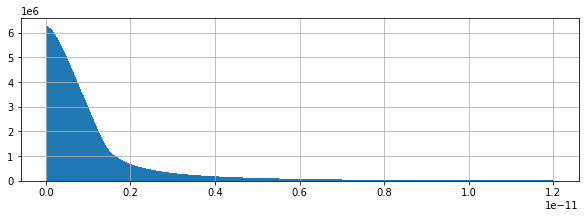

In [36]:
plt.figure(figsize=(10,3));

plt.hist(tmp[np.nonzero(tmp > 0)],np.linspace(0, 1.2e-11,1000));
plt.grid()

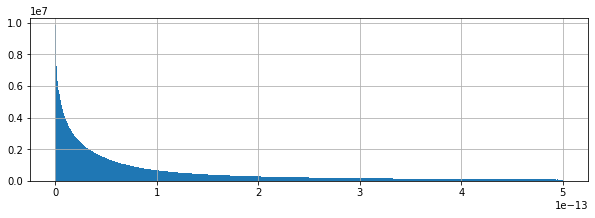

### Histogram of residuals
We can look at the distribution of residuals to get a little more confidence.

In [25]:
from xhistogram.xarray import histogram

In [48]:
res_closed = np.abs(G_advection_Sln + G_diffusion_Sln + G_forcing_Sln - G_total_Sln)
res_closed.name = 'Residual_closed'

In [50]:
res_offline = np.abs(G_advection + G_diffusion_Sln + G_forcing_Sln - G_total_Sln)
res_offline.name = 'Residual_offline'

In [71]:
res_adv = np.abs(G_diffusion_Sln + G_forcing_Sln - G_total_Sln)
res_adv.name = 'Residual_advection'

In [72]:
res_dif = np.abs(G_advection_Sln  + G_forcing_Sln - G_total_Sln)
res_dif.name = 'Residual_diffusion'

In [73]:
res_frc = np.abs(G_advection_Sln + G_diffusion_Sln - G_total_Sln)
res_frc.name = 'Residual_forcing'

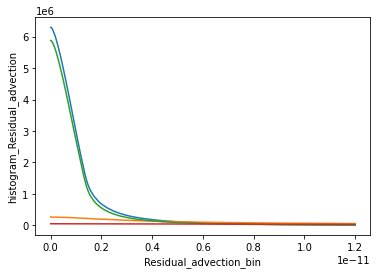

In [74]:
histogram(res_closed, bins = [np.linspace(0, 1.2e-11,1000)]).plot()
histogram(res_dif, bins = [np.linspace(0, 1.2e-11,1000)]).plot()
histogram(res_frc, bins = [np.linspace(0, 1.2e-11,1000)]).plot()
histogram(res_adv, bins = [np.linspace(0, 1.2e-11,1000)]).plot()

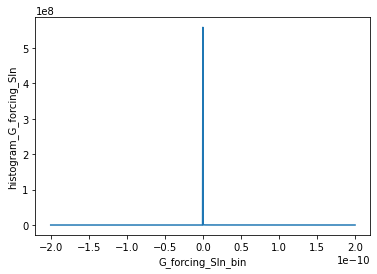

In [85]:
histogram(G_forcing_Sln, bins = [np.linspace(-2e-10, 2e-10,1000)]).plot()

In [78]:
G_forcing_Sln.max().values

array(3.7624181e-06, dtype=float32)

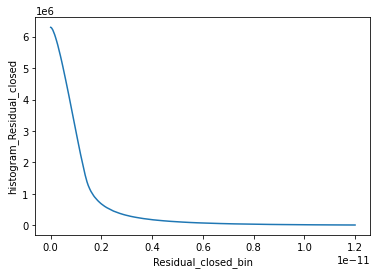

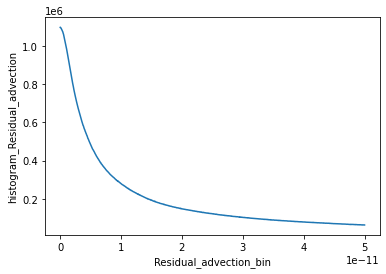

In [67]:
histogram(res_adv, bins = [np.linspace(0, 5e-11,1000)]).plot()

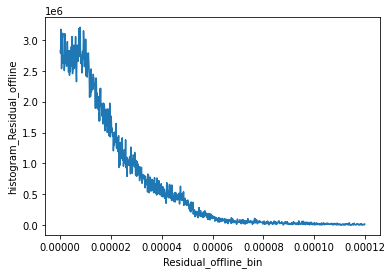

In [59]:
histogram(res_offline, bins = [np.linspace(0, 1.2e-4,1000)]).plot()